In [4]:
%matplotlib inline

In [5]:
capacity = {"eliot": 24, "ivaloo": 42, "morgan": 20, "lower park": 12, "upper park": 32}
total_capacity = sum(capacity.values())
print(total_capacity)

130


In [37]:
import matplotlib.pyplot as plt
import datetime as dt

[0.6153846153846154, 0.5076923076923077, 0.5692307692307692, 0.5846153846153846, 0.5923076923076923, 0.49230769230769234]


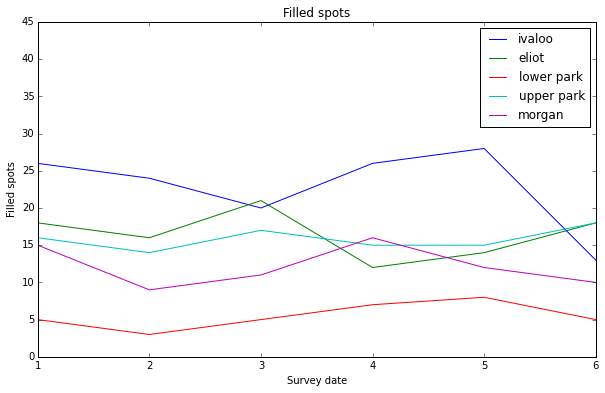

In [52]:
street_data = {"eliot": [18, 16, 21, 12, 14, 18], "ivaloo": [26, 24, 20, 26, 28, 13], "morgan": [15, 9, 11, 16, 12, 10],
                "lower park":[5, 3, 5, 7, 8, 5], "upper park": [16, 14, 17, 15, 15, 18]}

neighborhood_totals_by_date = [sum(x) for x in zip(*street_data.values())]

percentage_full_by_date = [x/total_capacity for x in neighborhood_totals_by_date]

x = [1,2,3,4,5,6]
dates = ['Wed Jan 27 10:00:00 2016', 'Wed Jan 27 16:00:00 2016', 'Wed Jan 27 21:00:00 2016', 'Thu Jan 28 10:00:00 2016', 'Thu Jan 28 16:00:00 2016', 'Thu Jan 28 21:00:00 2016']
d = [dt.datetime.strptime(x, '%a %b %d %H:%M:%S %Y') for x in dates]

colors={'eliot': 'red', 'ivaloo': 'green', 'morgan': 'blue', 'lower park': 'orange', 'upper park': 'purple'}

plt.figure(1, figsize=(10, 6))
plt.xlabel('Survey date')
plt.ylabel('Filled spots')
plt.title('Filled spots')

for name, count in street_data.items():
    plt.plot(x, count, label=name)
plt.axis([1, 6, 0, 45])
plt.legend()
plt.show()

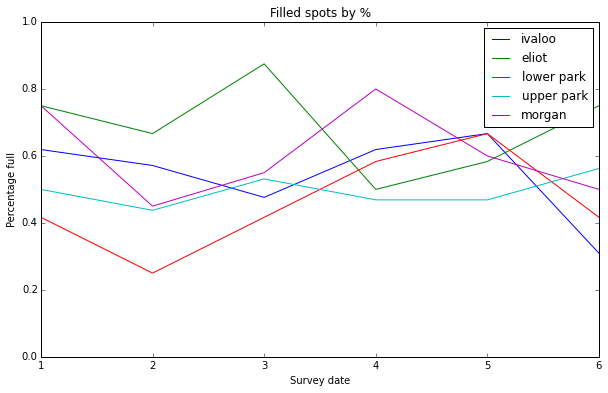

In [8]:
plt.figure(2, figsize=(10, 6))
plt.xlabel('Survey date')
plt.ylabel('Percentage full')
plt.title('Filled spots by %')

for name, count in street_data.items():
    plt.plot(x, [x/capacity[name] for x in count], label=name)
plt.axis([1, 6, 0, 1])
plt.legend()
plt.show()

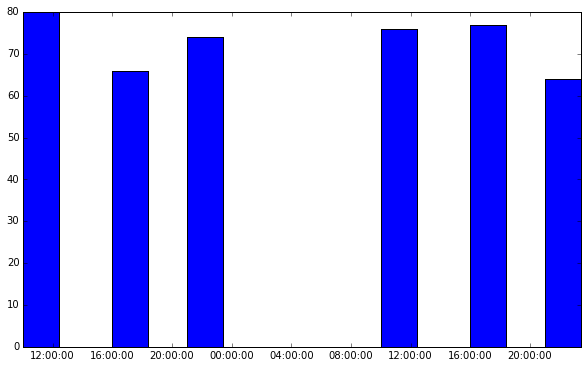

In [50]:
plt.figure(3, figsize=(10,6))
ax = plt.subplot(111)

ax.bar(d, neighborhood_totals_by_date, width=0.1)
ax.xaxis_date()

plt.show()

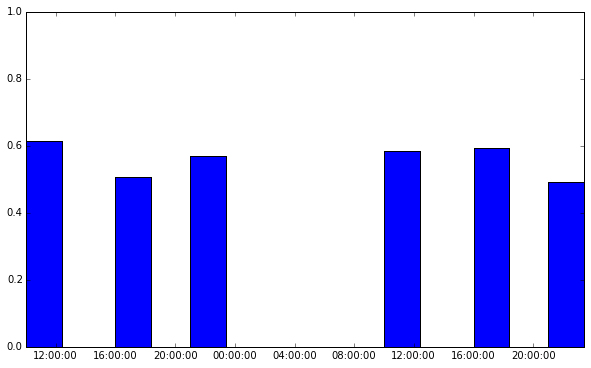

In [57]:
plt.figure(4, figsize=(10,6))
ax = plt.subplot(111)

ax.bar(d, percentage_full_by_date, width=0.1)
ax.xaxis_date()
plt.ylim([0,1])

plt.show()